In [1]:
#import necessary libraries 
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]
import seaborn as sns
import numpy as np

In [2]:
# toatl data for all terms file is saved in this directory 
directory = 'c:/Users/nafis/Documents/master_thesis_dir/thesis/google_trend_data/GT_update/df_total_all_hours_11_2022.csv'
df = pd.read_csv(directory, parse_dates = True, index_col = 'date')

In [3]:
df

,ahdistus,clinical depression,crippling depression,depression symptoms,depression test,depression,high functioning depression,itsemurha,kaksisuuntainen mielialahäiriö,keskivaikea masennus,...,nuorten masennus,postpartum depression,psykoosi,psykoottinen masennus,raskaus masennus,suicide,synnytyksen jälkeinen masennus,vaikea masennus,vakava masennus,väsymys
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,14.0,0.0,NaN,0.0,0.0,14.0,NaN,51.0,7.0,0.0,...,0.0,0.0,29.0,0.0,37.0,64.0,0.0,0.0,0.0,10.0
2015-01-01 01:00:00,12.0,0.0,NaN,48.0,31.0,36.0,NaN,22.0,29.0,0.0,...,0.0,0.0,7.0,0.0,53.0,70.0,0.0,0.0,0.0,33.0
2015-01-01 02:00:00,11.0,0.0,NaN,0.0,0.0,52.0,NaN,62.0,41.0,0.0,...,0.0,0.0,27.0,0.0,0.0,48.0,12.0,65.0,0.0,16.0
2015-01-01 03:00:00,7.0,0.0,NaN,0.0,0.0,20.0,NaN,25.0,18.0,0.0,...,0.0,0.0,14.0,0.0,0.0,21.0,0.0,0.0,0.0,21.0
2015-01-01 04:00:00,0.0,0.0,NaN,100.0,0.0,11.0,NaN,18.0,0.0,0.0,...,0.0,0.0,63.0,0.0,0.0,29.0,0.0,0.0,0.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,14.0,14.0,0.0,0.0,14.0,8.0,0.0,18.0,25.0,7.0,...,0.0,0.0,33.0,0.0,0.0,13.0,0.0,0.0,0.0,32.0
2020-12-31 20:00:00,16.0,0.0,0.0,0.0,7.0,12.0,0.0,29.0,11.0,0.0,...,0.0,0.0,19.0,0.0,16.0,31.0,9.0,0.0,33.0,27.0
2020-12-31 21:00:00,12.0,0.0,0.0,18.0,8.0,20.0,0.0,20.0,22.0,0.0,...,0.0,0.0,6.0,9.0,0.0,30.0,0.0,0.0,0.0,19.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52608 entries, 2015-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ahdistus                        52273 non-null  float64
 1   clinical depression             52106 non-null  float64
 2   crippling depression            44050 non-null  float64
 3   depression symptoms             51438 non-null  float64
 4   depression test                 50433 non-null  float64
 5   depression                      52273 non-null  float64
 6   high functioning depression     34002 non-null  float64
 7   itsemurha                       52273 non-null  float64
 8   kaksisuuntainen mielialahäiriö  52106 non-null  float64
 9   keskivaikea masennus            52273 non-null  float64
 10  krooninen masennus              52273 non-null  float64
 11  lapsen masennus                 52273 non-null  float64
 1

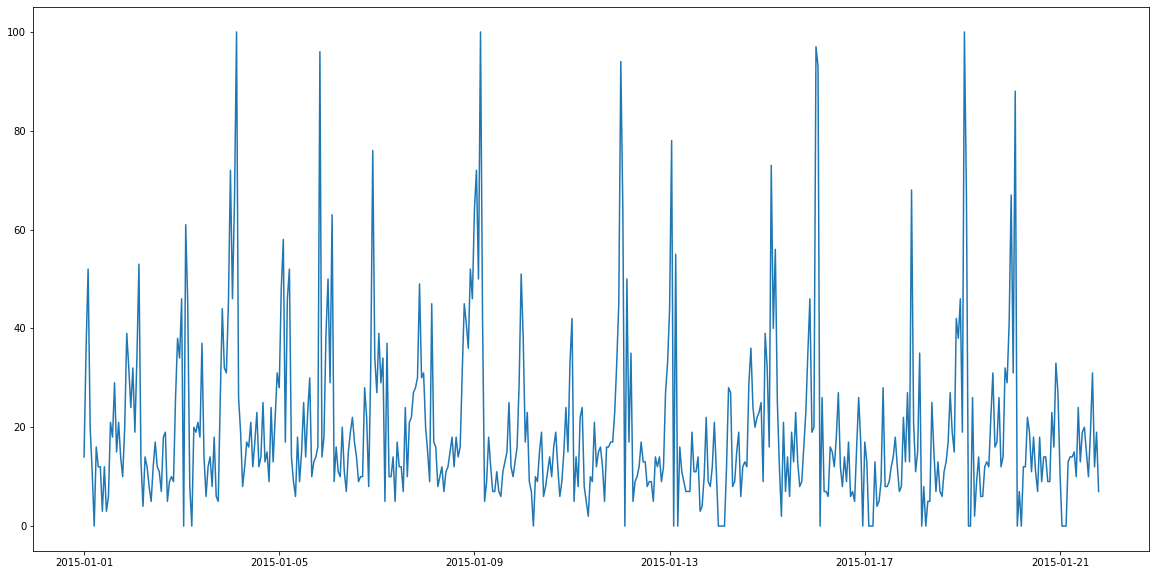

In [7]:
plt.plot(df['depression'].iloc[:500])

In [8]:
count_nulls_df = pd.DataFrame(df.isnull().sum())
count_nulls_df.columns  = ['number_nulls']

In [9]:
count_nulls_df.head()

,number_nulls
ahdistus,335
clinical depression,502
crippling depression,8558
depression symptoms,1170
depression test,2175


In [10]:
count_nulls_df.sort_values(by=['number_nulls'], ascending = False, axis =0, inplace = True)

In [12]:
count_nulls_df.head()

,number_nulls
high functioning depression,18606
crippling depression,8558
depression test,2175
depression symptoms,1170
postpartum depression,669


In [13]:
cluster1 = ['ahdistus', 'depression', 'itsemurha', 'kaksisuuntainen mielialahäiriö',
       'masennus', 'masennustesti', 'mielenterveys', 'psykoosi', 'suicide',
       'väsymys']

In [15]:
import math
import waipy
def wavelet_terms(df, term):
        df_term = df[term].fillna(0)
        l = len(df_term)
        z = np.linspace(0,l, l)
        x = df_term.squeeze().values
        data_norm = waipy.normalize(x) 
        dt =1
        pad = 1         # pad the time series with zeroes (recommended)
        dj = 0.25       # this will do 4 sub-octaves per octave
        s0 = 2*dt       # this says start at a scale of 2 hours for dt = 1hour
        j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
        lag1 = 0.72     # lag-1 autocorrelation for red noise background
        param = 6
        mother = 'Morlet'
        dtmin = 0.25/8    # dt/n of suboctaves
        result = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='time(hour)')
        return result
        
        

In [16]:
results = dict()
for term in cluster1:
    results[term] = wavelet_terms(df, term)
    

Nr of Scales: 58
scales [2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0, 76.10925536017415, 90.50966799187809, 107.63474115247546, 128.0, 152.2185107203483, 181.01933598375618, 215.2694823049509, 256.0, 304.4370214406966, 362.03867196751236, 430.5389646099018, 512.0, 608.8740428813932, 724.0773439350247, 861.0779292198037, 1024.0, 1217.7480857627863, 1448.1546878700494, 1722.1558584396073, 2048.0, 2435.4961715255727, 2896.309375740099, 3444.3117168792146, 4096.0, 4870.992343051145, 5792.618751480198, 6888.623433758429, 8192.0, 9741.98468610229, 11585.237502960395, 13777.246867516858, 16384.0, 19483.96937220458, 23170.47500592079, 27554.493735033717, 32768.0, 38967.93874440916, 46340.95001184158]
Nr of Scales: 58
s

Nr of Scales: 58
scales [2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0, 76.10925536017415, 90.50966799187809, 107.63474115247546, 128.0, 152.2185107203483, 181.01933598375618, 215.2694823049509, 256.0, 304.4370214406966, 362.03867196751236, 430.5389646099018, 512.0, 608.8740428813932, 724.0773439350247, 861.0779292198037, 1024.0, 1217.7480857627863, 1448.1546878700494, 1722.1558584396073, 2048.0, 2435.4961715255727, 2896.309375740099, 3444.3117168792146, 4096.0, 4870.992343051145, 5792.618751480198, 6888.623433758429, 8192.0, 9741.98468610229, 11585.237502960395, 13777.246867516858, 16384.0, 19483.96937220458, 23170.47500592079, 27554.493735033717, 32768.0, 38967.93874440916, 46340.95001184158]


In [18]:
import matplotlib
plt.rcParams['axes.formatter.useoffset'] = False

plt.rcParams.update({'font.size': 10})
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.rcParams.update({'axes.titlesize': 'large'})

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'depression'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

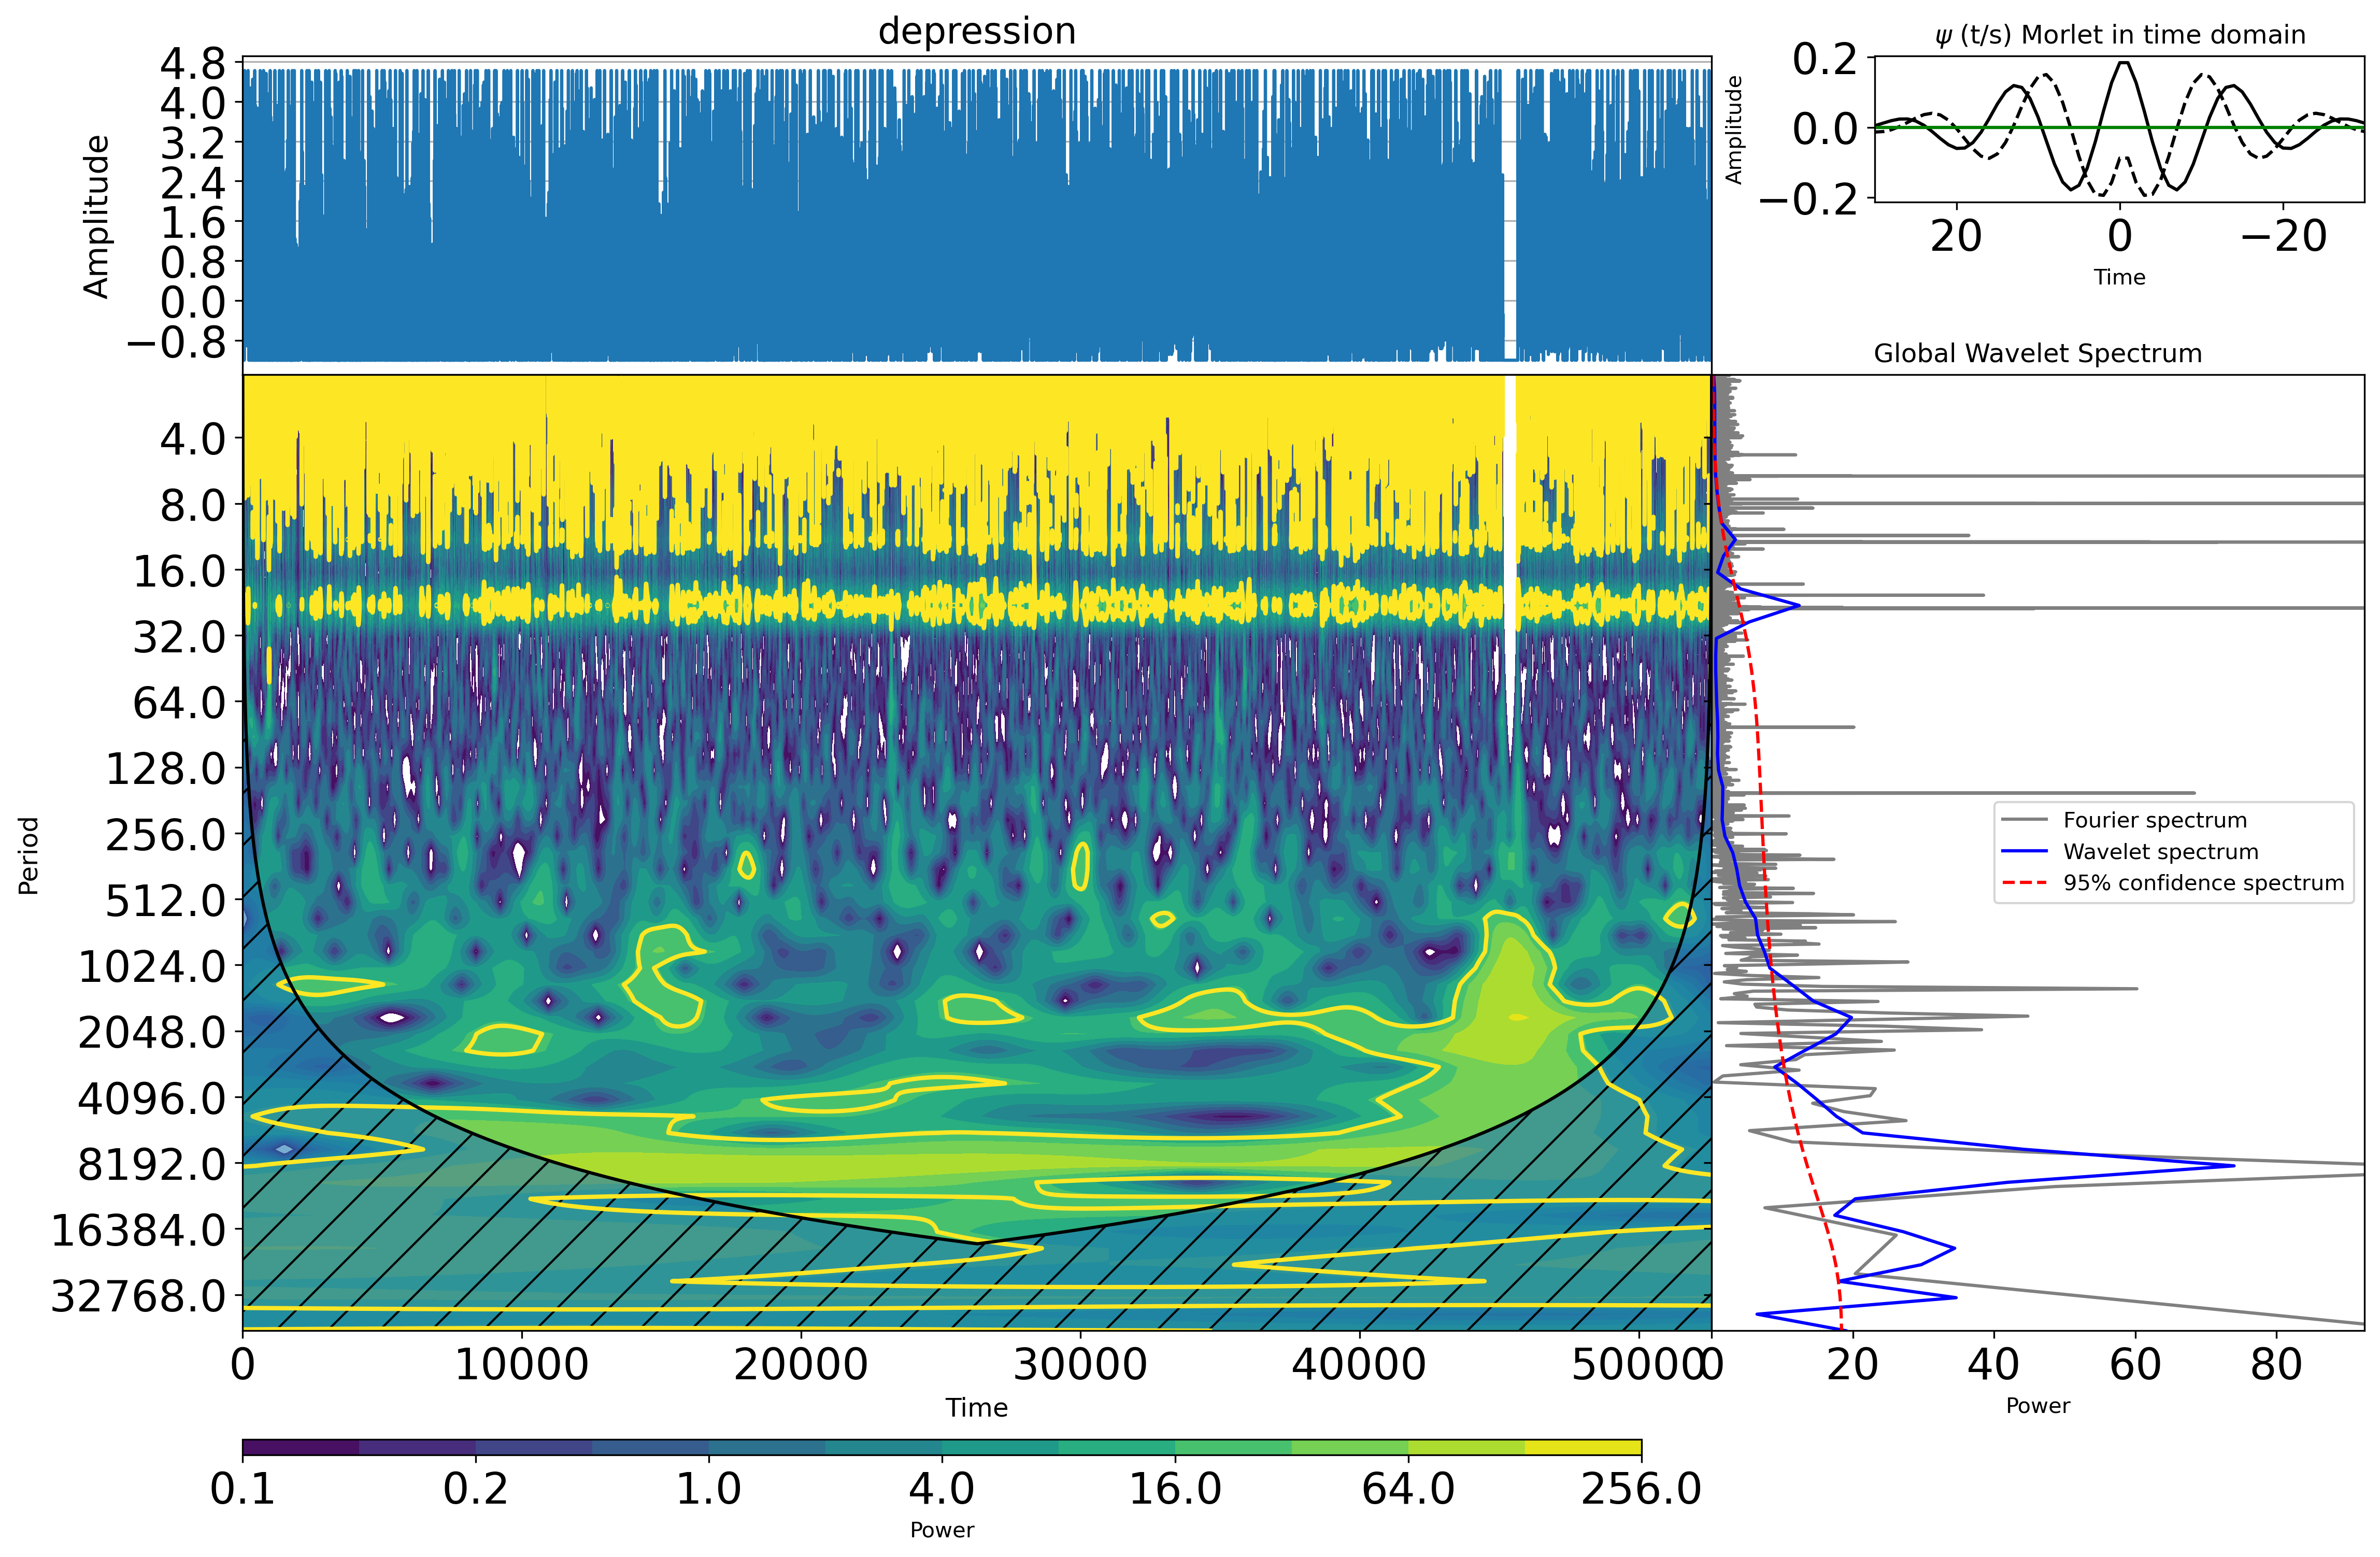

In [21]:
# as it is very heavy to plot all the terms we just plot deprssion
df_term = df[term].fillna(0)
l = len(df_term)
z = np.linspace(0,l, l)
x = df_term.squeeze().values
data_norm = waipy.normalize(x) 
dt =1
pad = 1         # pad the time series with zeroes (recommended)
dj = 0.25       # this will do 4 sub-octaves per octave
s0 = 2*dt       # this says start at a scale of 2 hours for dt = 1hour
j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72     # lag-1 autocorrelation for red noise background
param = 6
mother = 'Morlet'
dtmin = 0.25/8    # dt/n of suboctaves
term = 'depression'
# for term in cluster1:
#     waipy.wavelet_plot(f'{term}', z, data_norm, dtmin, results[term])
waipy.wavelet_plot(f'{term}', z, data_norm, dtmin, results[term])    

### clustering AgglomerativeClustering n = 2

In [ ]:
## Above we just plotted wavelet for terms in clsuter of K-means however, s as we are inersted in agglomerative clustering we just add two other terms

In [22]:
terms = ['ahdistus', 'depression', 'itsemurha', 'kaksisuuntainen mielialahäiriö',
       'masennus oireet', 'masennus', 'masennuslääkkeet', 'masennustesti',
       'mielenterveys', 'psykoosi', 'suicide', 'väsymys']

In [23]:
# the terms are similar to k-means clustering exept two added bellow terms
remaing_terms = [d for d in terms if d not in cluster1]
remaing_terms

['masennus oireet', 'masennuslääkkeet']

In [24]:

results_r = dict()
for term in remaing_terms:
    results_r[term] = wavelet_terms(df, term)

Nr of Scales: 58
scales [2.0, 2.378414230005442, 2.8284271247461903, 3.363585661014858, 4.0, 4.756828460010884, 5.656854249492381, 6.727171322029716, 8.0, 9.513656920021768, 11.313708498984761, 13.454342644059432, 16.0, 19.027313840043536, 22.627416997969522, 26.908685288118864, 32.0, 38.05462768008707, 45.254833995939045, 53.81737057623773, 64.0, 76.10925536017415, 90.50966799187809, 107.63474115247546, 128.0, 152.2185107203483, 181.01933598375618, 215.2694823049509, 256.0, 304.4370214406966, 362.03867196751236, 430.5389646099018, 512.0, 608.8740428813932, 724.0773439350247, 861.0779292198037, 1024.0, 1217.7480857627863, 1448.1546878700494, 1722.1558584396073, 2048.0, 2435.4961715255727, 2896.309375740099, 3444.3117168792146, 4096.0, 4870.992343051145, 5792.618751480198, 6888.623433758429, 8192.0, 9741.98468610229, 11585.237502960395, 13777.246867516858, 16384.0, 19483.96937220458, 23170.47500592079, 27554.493735033717, 32768.0, 38967.93874440916, 46340.95001184158]
Nr of Scales: 58
s

In [26]:
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams.update({'font.size': 10})
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.rcParams.update({'axes.titlesize': 'large'})

In [27]:
term = remaing_terms
df_term = df[term].fillna(0)
l = len(df_term)
z = np.linspace(0,l, l)
x = df_term.squeeze().values
data_norm = waipy.normalize(x) 
dt =1
pad = 1         # pad the time series with zeroes (recommended)
dj = 0.25       # this will do 4 sub-octaves per octave
s0 = 2*dt       # this says start at a scale of 2 hours for dt = 1hour
j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72     # lag-1 autocorrelation for red noise background
param = 6
mother = 'Morlet'
dtmin = 0.25/8   

In [ ]:
# as it heavy calulation I saved the plots before and do not run it now
# for term in remaing_terms:
#     waipy.wavelet_plot(f'{term}', z, data_norm, dtmin, results_r[term])

In [28]:
import sys
from PIL import Image
import math
import glob
def composed_images(directory,n_col=3):
    # to open all the png images in a list
    images = []
    for dirs in glob.glob(directory+'/*.png'):
        images.append(Image.open(dirs))

    n_row =math.ceil(len(images)/n_col) # to define number of rows 
    width, height = images[0].size # all images are same size

    total_width = width*n_col
    total_height = height*n_row

    new_im = Image.new('RGB', (total_width, total_height))
    y_offsets = [[i]*(n_col) for i in range(n_row)] # to havea list of integers for each image which will be same for each row
    y_offsets = [s*height for i in y_offsets for s in i] # to flatten the y_off list and multiply it by height 
    x_offsets = list(range(n_col))*(n_row)  # to havea list of integers for each image which will be same for each column
    x_offsets = [i*width for i in x_offsets ]# to  multiply it by width
    for im, x_off,y_off in zip(images, x_offsets, y_offsets):
            new_im.paste(im, (x_off,y_off))
#     display(new_im)
    new_im.save(directory+'\\composed_image.jpg')

In [29]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
def crop_resize_title(img_dir, title, dir_save):
    img = Image.open(img_dir)
    width, height = img.size
    # Setting the points for cropped image
    left = 5
    top = height / 5+130
    right = 2*width/3+150
    bottom =height-20 
    # Cropped image of above dimension
    # (It will not change original image)
    im1 = img.crop((left, top, right, bottom))
    # Call draw Method to add 2D graphics in an image
    w,h = im1.size
    I1 = ImageDraw.Draw(im1)

    # Custom font style and font size
    myFont = ImageFont.truetype("arial.ttf", 150)
    title = title.capitalize()
    # Add Text to an image
    I1.text((((w-len(title)*46-50))/2, 20), title, font=myFont, fill =(0, 0, 10))
#     newsize = (320, 280)
#     im2 = im1.resize(newsize)
    im1.save(dir_save+f'/{title}.png')

In [30]:
dire_img = 'C:\\Users\\nafis\\Documents\\master_thesis_dir\\thesis\\notebooks\\images_wavelet'

In [31]:
# call the function to complied the croped images in one image  
directory = dire_img+'/complied'
composed_images(directory,n_col=3)

###  crop and name each plot based on the term and then save the new plots in compiled file direction

In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
def crop_resize_title(img_dir, title, dir_save):
    img = Image.open(img_dir)
    width, height = img.size
    # Setting the points for cropped image
    left = 85
    top = height / 5+130
    right = 2*width/3+300
    bottom =height-20
    # Cropped image of above dimension
    # (It will not change original image)
    im1 = img.crop((left, top, right, bottom))
    # Call draw Method to add 2D graphics in an image
    w,h = im1.size
    I1 = ImageDraw.Draw(im1)

    # Custom font style and font size
    myFont = ImageFont.truetype("arial.ttf", 150)
    title = title.capitalize()
    W, H = I1.textsize(title)
    # Add Text to an image
    I1.text((((w-W-50))/2, 20), title, font=myFont, fill =(0, 0, 10))
#     newsize = (320, 280)
#     im2 = im1.resize(newsize)
#     im1.save(dir_save+f'/{title}.png')

In [ ]:
import sys
from PIL import Image
import math
import glob
def composed_images(directory,n_col=3):
    # to open all the png images in a list
    images = []
    for dirs in glob.glob(directory+'/*.png'):
        images.append(Image.open(dirs))

    n_row =math.ceil(len(images)/n_col) # to define number of rows 
    width, height = images[0].size # all images are same size

    total_width = width*n_col
    total_height = height*n_row

    new_im = Image.new('RGB', (total_width, total_height))
    y_offsets = [[i]*(n_col) for i in range(n_row)] # to havea list of integers for each image which will be same for each row
    y_offsets = [s*height for i in y_offsets for s in i] # to flatten the y_off list and multiply it by height 
    x_offsets = list(range(n_col))*(n_row)  # to havea list of integers for each image which will be same for each column
    x_offsets = [i*width for i in x_offsets ]# to  multiply it by width
    for im, x_off,y_off in zip(images, x_offsets, y_offsets):
            new_im.paste(im, (x_off,y_off))
#     display(new_im)
    new_im.save(directory+'\\composed_image.jpg')

In [ ]:

# import re 
# dir_save = dire_img+'/complied'
# for dirs in glob.glob(dire_img+'/*.png'):
#         regex = r'.*\\(.*)\.png'
#         x = re.compile(regex)
#         terms = x.search(dirs).groups()[0]
#         crop_resize_title(dirs, terms,dir_save )
        

In [ ]:
dire_img = 'C:\\Users\\nafis\\Documents\\master_thesis_dir\\thesis\\notebooks\\images_wavelet'

In [ ]:
dire_img ='C:\\Users\\nafis\\Documents\\master_thesis_dir\\thesis\\notebooks\\images_wavelet\\pict_bigger_fonts'

In [ ]:
import re 
import glob
dir_save = dire_img+'/complied_image_big'
for dirs in glob.glob(dire_img+'/*.png'):
        regex = r'.*\\(.*)\.png'
        x = re.compile(regex)
        terms = x.search(dirs).groups()[0]
        crop_resize_title(dirs, terms,dir_save )

In [ ]:
import glob
directory = dire_img+'/complied_image_big'
composed_images(directory,n_col=3)

In [ ]:
im = Image.open(directory+'/composed_image.jpg')
# W,H = im.size
# msg = 'Period/hour'
# draw = ImageDraw.Draw(im)
# w, h = draw.textsize(msg)
# draw.text((10,(H-h)/2), msg, fill="black", rotation='vertical', size = 16)

# fig.text(0.5, 0.09, 'Date', ha='center', va='center', size = 16)
# fig.text(0.09, 0.5, 'RSV', ha='center', va='center', rotation='vertical', size = 16)

In [ ]:
display(im)